In [1]:
#importing matplotlib for plotting
import matplotlib.pyplot as plt

#importing random_noise from skimage to add noise to image
from skimage.util import random_noise

#importing numpy to work math operations and array
import numpy as np

#importing skimage.io and PIL.image to open a image
from skimage import io
#PIL is used to open all types of image even in a compressed format
#since we need to open a compressed format image we use this
#but why we import skimage io is , it does not support a compressed
#fomat image but it will give images in array format where as PIL 
# gives us a image object 
from PIL import Image 

#importing scipy.sparse to manipulate sparsity in a matrix 
from scipy import sparse
from scipy.sparse.linalg import spsolve

#importing metrics to calculate psnr value
from skimage import metrics


In [2]:
def sparse_diags(Dia,M):
    dia = Dia #{0:1 , 1:2 , 2:3}
    
    #creating a zeros matrix (size = input image size)
    DM = np.zeros([M,M])
    
    
    #this for loop is used to traverse the rows of
    #zeros matrix to append the values in the 
    #appropriate position 
    for i in range(M):
        
        #this forloop is used to get the
        #position and then to add the values 
        #in that particular position 
        for j in dia:
            
            #this if statement is used to 
            #avoid the index bound error
            #if the position give goes beyond 
            #position of matrix with respect to
            #the main diagonal position
            if i+j >= 0 and i+j < M:
                DM[i][i+j] = dia[j]
    return sparse.coo_matrix(DM)

Denoising image

In [6]:
#loading our image
img = io.imread('cameraman.jpeg')

#adding gaussian noise to the image
noise_img = random_noise(img, mode='gaussian')

lamda = 0.9


M = noise_img.shape[0]

#giving diagonal position and values accordingly
#here 
#position 0 = main diagonal
#position in negative = distance away from main diagonal - leftwards
#position in positive = distance away from main diagonal - rightwards

Dia = {0:1 , 1:-2 , 2:1}# key [diag pos] and values [diag pos values]
    
#calculating the D-matrix
D = sparse_diags(Dia,M)

# '@' operator is used for matrix multiplication    
F = sparse.eye(M) + lamda* (D.T@D) 

x = spsolve(F, noise_img)

denoised_image = ((spsolve(F, x.T)).T)*256


ValueError: object too deep for desired array

PSNR

In [8]:
psnr_denoised = round(metrics.peak_signal_noise_ratio(img,denoised_image.astype(np.uint8)),1)
psnr_noised = round(metrics.peak_signal_noise_ratio(img,noise_img.astype(np.uint8)),1)

Plot

Text(0.5, 1.0, 'Denoised image (PSNR =24.1)')

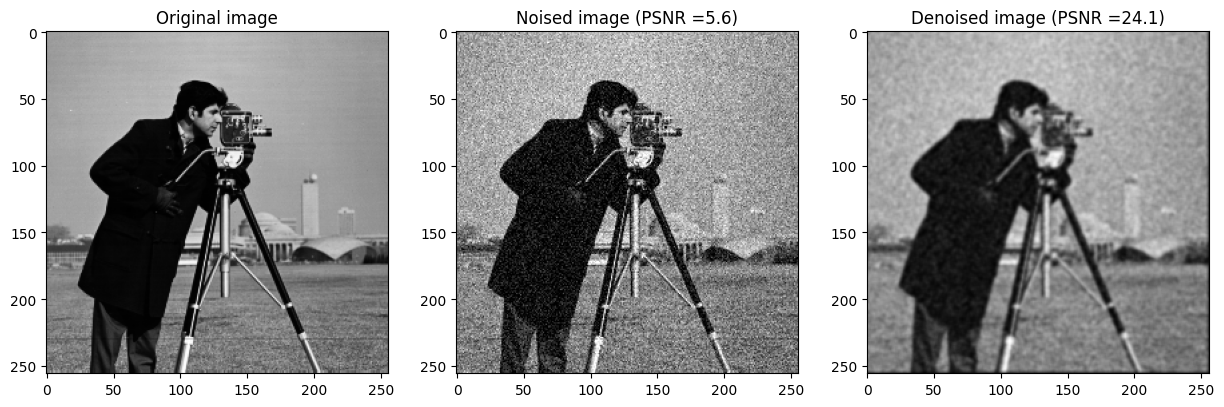

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(noise_img, cmap='gray')
ax[1].set_title(f'Noised image (PSNR ={psnr_noised})')


ax[2].imshow(denoised_image, cmap='gray')
ax[2].set_title(f'Denoised image (PSNR ={psnr_denoised})')